In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB

In [2]:
def validacionCruzada(X_train, y_train, kf, df):
    results = []
    for weights in [None, 'distance', 'uniform']:
        n_neighbors = 1 if weights is None else 10
        for fold_num, (train_index, test_index) in enumerate(kf.split(X_train), start=1):
            X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
            y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

            knn_model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
            knn_model.fit(X_train_fold, y_train_fold)
            score = knn_model.score(X_test_fold, y_test_fold)
            results.append({
                "Dataset": df,
                "Vecinos": n_neighbors,
                "Pesos": weights if weights else "--------",
                "Fold": fold_num,
                "Accuracy": score
            })
        results.append({
            "Dataset": df,
            "Vecinos": n_neighbors,
            "Pesos": weights if weights else "--------",
            "Fold": "Promedio",
            "Accuracy": np.mean([result["Accuracy"] for result in results[-3:]])
        })

    return pd.DataFrame(results)

In [3]:
iris_df = pd.read_csv('iris.csv')
emails_df = pd.read_csv('emails.csv').iloc[:, 1:]

In [4]:
x, y = iris_df.drop("species", axis=1).values, iris_df["species"].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)
x2,y2 = emails_df.drop("Prediction", axis=1).values, emails_df["Prediction"].values
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y2,test_size=0.3,random_state=0)

In [5]:
kf = KFold(n_splits=3)
results_df = validacionCruzada(x_train, y_train, kf, 'iris_df')
results_df2 = validacionCruzada(x_train2, y_train2, kf,'emails_df' )

In [6]:
pd.concat([results_df, results_df2],ignore_index=True)

,Dataset,Vecinos,Pesos,Fold,Accuracy
0,iris_df,1,--------,1,0.857143
1,iris_df,1,--------,2,1.000000
2,iris_df,1,--------,3,0.942857
3,iris_df,1,--------,Promedio,0.933333
4,iris_df,10,distance,1,0.914286
5,iris_df,10,distance,2,1.000000
6,iris_df,10,distance,3,0.914286
7,iris_df,10,distance,Promedio,0.942857
8,iris_df,10,uniform,1,0.914286
9,iris_df,10,uniform,2,1.000000


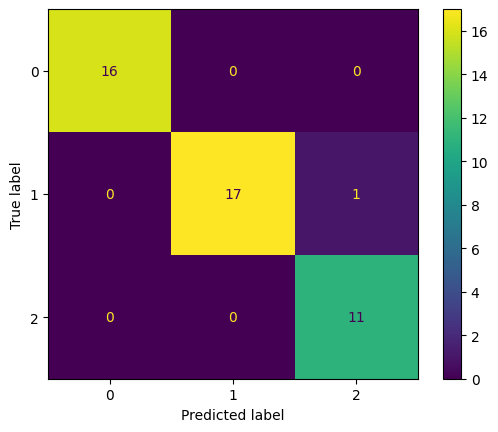

In [7]:
modeloUniforme = results_df[(results_df['Pesos'] == 'uniform') & (results_df['Fold'] == 'Promedio')].iloc[0]
vecinos = modeloUniforme['Vecinos']
modeloUniformeKNN = KNeighborsClassifier(n_neighbors=vecinos, weights='uniform')
modeloUniformeKNN.fit(x_train, y_train)
y_pred = modeloUniformeKNN.predict(x_test)
matrizConf = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrizConf).plot()

In [8]:
reporteIris = classification_report(y_test, y_pred, output_dict=True)
reportedfIris = pd.DataFrame(reporteIris).transpose()
reportedfIris

,precision,recall,f1-score,support
Iris-setosa,1.000000,1.000000,1.000000,16.000000
Iris-versicolor,1.000000,0.944444,0.971429,18.000000
Iris-virginica,0.916667,1.000000,0.956522,11.000000
accuracy,0.977778,0.977778,0.977778,0.977778
macro avg,0.972222,0.981481,0.975983,45.000000
weighted avg,0.979630,0.977778,0.977943,45.000000


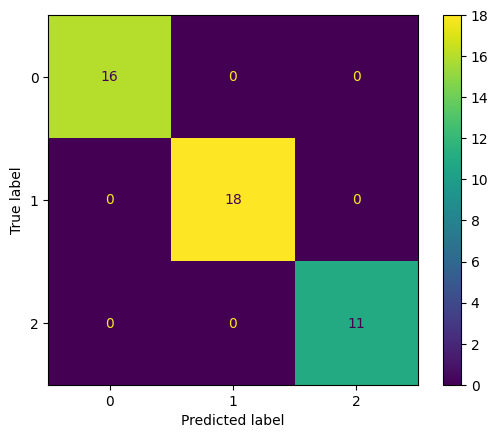

In [9]:
uniformeGauss = GaussianNB()
uniformeGauss.fit(x_train, y_train)
y_predGauss = uniformeGauss.predict(x_test)
matrizConfGauss = confusion_matrix(y_test, y_predGauss)
ConfusionMatrixDisplay(matrizConfGauss).plot()

In [10]:
reporteIris2 = classification_report(y_test, y_predGauss, output_dict=True)
reportedfIris2 = pd.DataFrame(reporteIris2).transpose()
reportedfIris2

,precision,recall,f1-score,support
Iris-setosa,1.0,1.0,1.0,16.0
Iris-versicolor,1.0,1.0,1.0,18.0
Iris-virginica,1.0,1.0,1.0,11.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,45.0
weighted avg,1.0,1.0,1.0,45.0


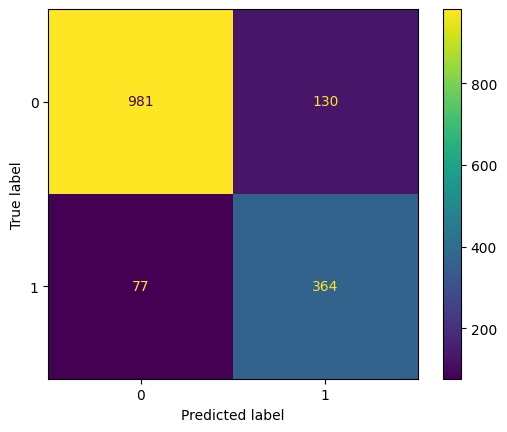

In [11]:
modeloUniforme2 = results_df2[(results_df2['Pesos'] == 'distance') & (results_df2['Fold'] == 'Promedio')].iloc[0]
vecinos2 = modeloUniforme2['Vecinos']
modeloUniformeKNN2 = KNeighborsClassifier(n_neighbors=vecinos2, weights='distance')
modeloUniformeKNN2.fit(x_train2, y_train2)
y_pred2 = modeloUniformeKNN2.predict(x_test2)
matrizConf2 = confusion_matrix(y_test2, y_pred2)
ConfusionMatrixDisplay(matrizConf2).plot()

In [12]:
reporteEmails = classification_report(y_test2, y_pred2, output_dict=True)
reporte_dfEmails = pd.DataFrame(reporteEmails).transpose()
reporte_dfEmails

,precision,recall,f1-score,support
0,0.927221,0.882988,0.904564,1111.000000
1,0.736842,0.825397,0.778610,441.000000
accuracy,0.866624,0.866624,0.866624,0.866624
macro avg,0.832032,0.854193,0.841587,1552.000000
weighted avg,0.873125,0.866624,0.868774,1552.000000


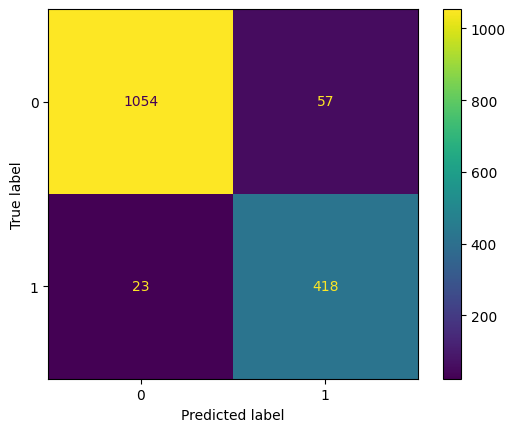

In [13]:
uniformeGauss2 = GaussianNB()
uniformeGauss2.fit(x_train2, y_train2)
y_predGauss2 = uniformeGauss2.predict(x_test2)
matrizConfGauss2 = confusion_matrix(y_test2, y_predGauss2)
ConfusionMatrixDisplay(matrizConfGauss2).plot()

In [14]:
reporteEmails2 = classification_report(y_test2, y_predGauss2, output_dict=True)
reporte_dfEmails2 = pd.DataFrame(reporteEmails2).transpose()
reporte_dfEmails2

,precision,recall,f1-score,support
0,0.978644,0.948695,0.963437,1111.000000
1,0.880000,0.947846,0.912664,441.000000
accuracy,0.948454,0.948454,0.948454,0.948454
macro avg,0.929322,0.948270,0.938050,1552.000000
weighted avg,0.950615,0.948454,0.949010,1552.000000


In [16]:
final_df = pd.DataFrame(columns=['Dataset', 'Clasificador', 'Vecinos', 'Pesos', 'Distribución', 'Accuracy'])
final_df.loc[0] = ['iris.csv', 'Naive Bayes', '------', '------', 'Normal', reportedfIris2.loc['accuracy', 'precision']]
final_df.loc[1] = ['iris.csv', 'K-NN', '10', 'Uniforme', '------', reportedfIris.loc['accuracy', 'precision']]
final_df.loc[2] = ['emails.csv', 'Naive Bayes', '------', '------', 'Normal', reporte_dfEmails2.loc['accuracy', 'precision']]
final_df.loc[3] = ['emails.csv', 'K-NN', '10', 'Distancia', '------', reporte_dfEmails.loc['accuracy', 'precision']]
final_df

,Dataset,Clasificador,Vecinos,Pesos,Distribución,Accuracy
0,iris.csv,Naive Bayes,------,------,Normal,1.000000
1,iris.csv,K-NN,10,Uniforme,------,0.977778
2,emails.csv,Naive Bayes,------,------,Normal,0.948454
3,emails.csv,K-NN,10,Distancia,------,0.866624
